# **NO 1**

In [ ]:
import numpy as np

# Activation functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - x ** 2

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

# Choose one set of activation and its derivative here
activation = sigmoid
activation_deriv = sigmoid_deriv

# XOR Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Initialize weights
np.random.seed(1)
weights0 = 2 * np.random.rand(2, 4) - 1
weights1 = 2 * np.random.rand(4, 1) - 1

# Training
for epoch in range(10000):
    # Forward pass
    layer0 = X
    layer1 = activation(np.dot(layer0, weights0))
    layer2 = activation(np.dot(layer1, weights1))

    # Backward pass
    error = y - layer2
    layer2_delta = error * activation_deriv(layer2)
    layer1_error = layer2_delta.dot(weights1.T)
    layer1_delta = layer1_error * activation_deriv(layer1)

    # Weight updates
    weights1 += layer1.T.dot(layer2_delta)
    weights0 += layer0.T.dot(layer1_delta)

# Test
print("Output after training:")
print(np.round(layer2, 3))


Output after training:
[[0.022]
 [0.983]
 [0.98 ]
 [0.018]]


# **NO 2**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8819 - loss: 0.4165 - val_accuracy: 0.9694 - val_loss: 0.0961
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9726 - loss: 0.0886 - val_accuracy: 0.9762 - val_loss: 0.0758
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9829 - loss: 0.0538 - val_accuracy: 0.9793 - val_loss: 0.0671
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9895 - loss: 0.0348 - val_accuracy: 0.9774 - val_loss: 0.0734
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9908 - loss: 0.0279 - val_accuracy: 0.9799 - val_loss: 0.0662
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9945 - loss: 0.0181 - val_accuracy: 0.9769 - val_loss: 0.0821
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.9769 - val_loss: 0.0919
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9939 - loss: 0.0185 - val

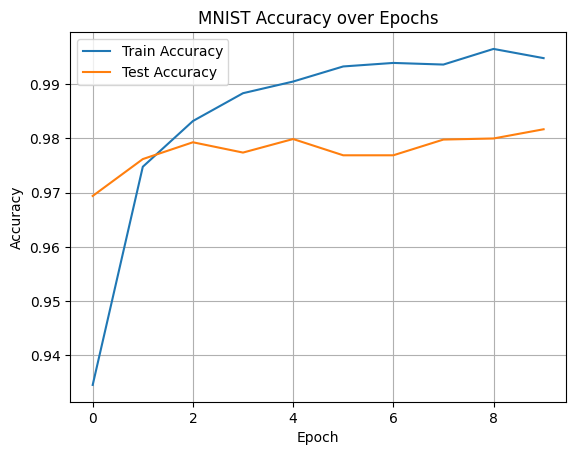

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10

# Set this flag to 'mnist' or 'cifar10'
dataset_choice = 'mnist'  # or 'cifar10'

# Load the dataset
if dataset_choice == 'mnist':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    input_shape = (28, 28)
elif dataset_choice == 'cifar10':
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    input_shape = (32, 32, 3)
    y_train = y_train.flatten()
    y_test = y_test.flatten()

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the Deep Feed Forward NN
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train and record accuracy over epochs
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=128)

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_choice.upper()} Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# **NO 3**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 91ms/step - accuracy: 0.8636 - loss: 0.4673 - val_accuracy: 0.9775 - val_loss: 0.0703
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.9803 - loss: 0.0622 - val_accuracy: 0.9831 - val_loss: 0.0489
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9863 - loss: 0.0438 - val_accuracy: 0.9875 - val_loss: 0.0351
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9915 - loss: 0.0279 - val_accuracy: 0.9883 - val_loss: 0.0336
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 96ms/step - accuracy: 0.9929 - loss: 0.0241 - val_accuracy: 0.9906 - val_loss: 0.0282
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9902 - val_loss: 0.0272
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9915 - val_loss: 0.0254
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 96ms/step - accuracy: 0.9967 - loss: 0.0109 - 

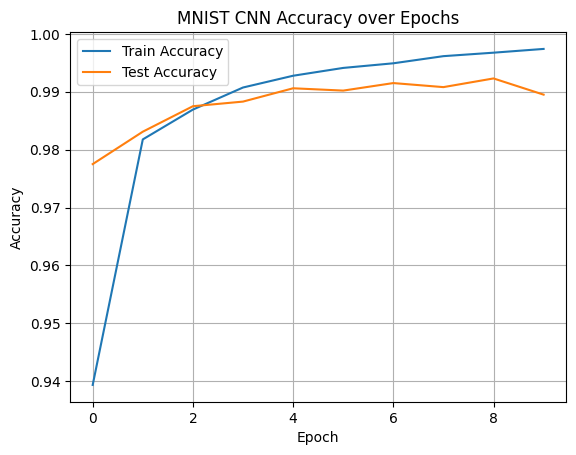

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Choose 'mnist' or 'cifar10'
dataset_choice = 'mnist'

# Load and preprocess data
if dataset_choice == 'mnist':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
elif dataset_choice == 'cifar10':
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    y_train = y_train.flatten()
    y_test = y_test.flatten()

# One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_choice.upper()} CNN Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# **NO 4**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Training with 5 epochs...
Epoch 1/5
391/391 - 141s - 361ms/step - accuracy: 0.3950 - loss: 1.6496 - val_accuracy: 0.5316 - val_loss: 1.3064
Epoch 2/5
391/391 - 140s - 357ms/step - accuracy: 0.5499 - loss: 1.2647 - val_accuracy: 0.5990 - val_loss: 1.1536
Epoch 3/5
391/391 - 144s - 368ms/step - accuracy: 0.6223 - loss: 1.0722 - val_accuracy: 0.6639 - val_loss: 0.9617
Epoch 4/5
391/391 - 144s - 369ms/step - accuracy: 0.6705 - loss: 0.9401 - val_accuracy: 0.6848 - val_loss: 0.8993
Epoch 5/5
391/391 - 138s - 354ms/step - accuracy: 0.7037 - loss: 0.8541 - val_accuracy: 0.7082 - val_loss: 0.8403
Finished in 710.98 seconds - Accuracy: 0.7082

Training with 10 epochs...
Epoch 1/10
391/391 - 138s - 352ms/step - accuracy: 0.3847 - loss: 1.6706 - val_accuracy: 0.5042 - val_loss: 1.3560
Epoch 2/10
391/391 - 147s - 375ms/step - accuracy: 0.5354 - loss: 1.3003 - val_accuracy: 0.5983 - val_loss: 1.1151
Epoch 3/10
391/391 - 141s - 361ms/step - accur

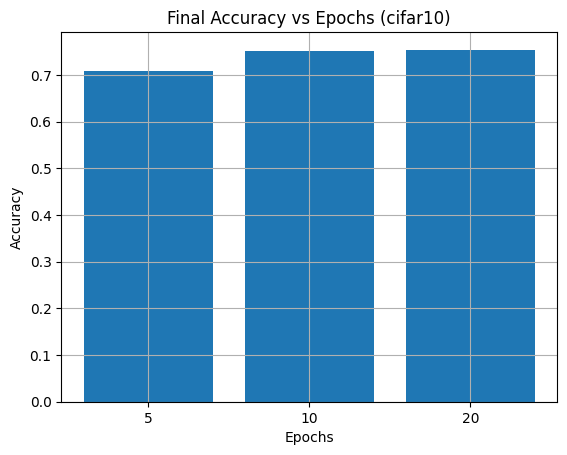

In [ ]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10

# Choose dataset: 'mnist', 'fashion_mnist', 'cifar10'
dataset_choice = 'cifar10'

# Load dataset
if dataset_choice == 'mnist':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
elif dataset_choice == 'fashion_mnist':
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
elif dataset_choice == 'cifar10':
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    y_train = y_train.flatten()
    y_test = y_test.flatten()

# One-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Function to build the CNN
def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Epoch settings
epoch_list = [5, 10, 20]
accuracies = {}
times = {}

# Get input shape dynamically
input_shape = x_train.shape[1:]

# Training for each epoch count
for epoch_count in epoch_list:
    print(f"\nTraining with {epoch_count} epochs...")

    model = build_model(input_shape)
    start_time = time.time()

    history = model.fit(
        x_train, y_train,
        epochs=epoch_count,
        validation_data=(x_test, y_test),
        batch_size=128,
        verbose=2
    )

    end_time = time.time()
    elapsed = end_time - start_time
    times[epoch_count] = elapsed

    acc = history.history['val_accuracy'][-1]
    accuracies[epoch_count] = acc

    print(f"Finished in {elapsed:.2f} seconds - Accuracy: {acc:.4f}")

# Display results
print("\n=== Accuracy by Epochs ===")
for e in epoch_list:
    print(f"Epochs: {e}, Accuracy: {accuracies[e]:.4f}, Time: {times[e]:.2f} sec")

# Optional: Plot accuracy per epoch run
plt.bar([str(e) for e in epoch_list], [accuracies[e] for e in epoch_list])
plt.title(f"Final Accuracy vs Epochs ({dataset_choice})")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


# **NO 5**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 378s 798ms/step - accuracy: 0.6998 - loss: 1.1308 - val_accuracy: 0.8198 - val_loss: 0.5173
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 385s 805ms/step - accuracy: 0.8562 - loss: 0.3998 - val_accuracy: 0.8873 - val_loss: 0.3040
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 384s 809ms/step - accuracy: 0.8764 - loss: 0.3459 - val_accuracy: 0.8902 - val_loss: 0.3065
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 381s 807ms/step - accuracy: 0.8896 - loss: 0.3038 - val_accuracy: 0.9029 - val_loss: 0.2662
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 374s 790ms/step - accuracy: 0.8959 - loss: 0.2793 - val_accuracy: 0.8938 - val_loss: 0.2951
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 392s 813ms/step - accuracy: 0.9088 - loss: 0.2555 - val_accuracy: 0.9106 - val_loss: 0.2378
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 375s 797ms/step - accuracy: 0.9145 - loss: 0.2388 - val_accuracy: 0.9187 - val_loss: 0.2209
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 368s 784ms/step - accuracy: 0.9179 -

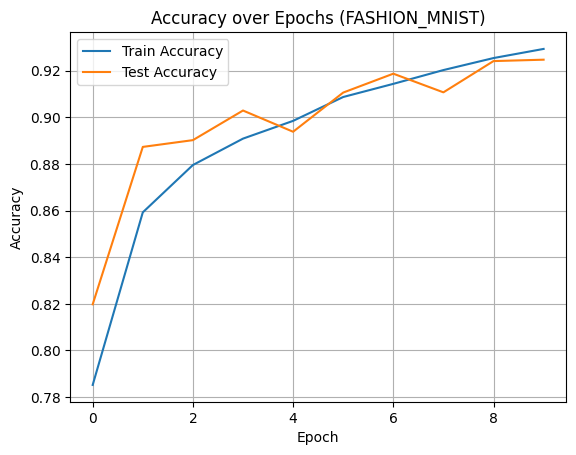

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Dataset choice: 'mnist', 'fashion_mnist', 'cifar10'
dataset_choice = 'fashion_mnist'

# Load data
if dataset_choice == 'mnist':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
elif dataset_choice == 'fashion_mnist':
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
elif dataset_choice == 'cifar10':
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    y_train = y_train.flatten()
    y_test = y_test.flatten()

# One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the CNN model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3 (Optional)
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=128)

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'Accuracy over Epochs ({dataset_choice.upper()})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



# **NO 6**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to build model with options
def build_model(use_l1=False, use_l2=False, use_dropout=False, dropout_rate=0.5):
    reg = None
    if use_l1:
        reg = l1(0.001)
    elif use_l2:
        reg = l2(0.001)

    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1), kernel_regularizer=reg))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=reg))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=reg))

    if use_dropout:
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define configs
configs = {
    'Base Model': {},
    'L1 Regularization': {'use_l1': True},
    'L2 Regularization': {'use_l2': True},
    'Dropout': {'use_dropout': True},
    'L2 + Dropout': {'use_l2': True, 'use_dropout': True},
}

# Results
results = {}

# Train each model
for name, config in configs.items():
    print(f"\n{name}")
    model = build_model(**config)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_data=(x_test, y_test), verbose=0)

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]
    results[name] = (train_acc, test_acc)
    print(f"Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")



Base Model
Training Accuracy: 0.9808, Test Accuracy: 0.9259

L1 Regularization
Training Accuracy: 0.8701, Test Accuracy: 0.8675

L2 Regularization
Training Accuracy: 0.9266, Test Accuracy: 0.9142

Dropout
Training Accuracy: 0.9553, Test Accuracy: 0.9298

L2 + Dropout
Training Accuracy: 0.9125, Test Accuracy: 0.9118


# **NO 7**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 316s 398ms/step - accuracy: 0.2598 - loss: 2.3001 - val_accuracy: 0.4446 - val_loss: 1.4803
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 402ms/step - accuracy: 0.4021 - loss: 1.6095 - val_accuracy: 0.4866 - val_loss: 1.3809
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 402ms/step - accuracy: 0.4948 - loss: 1.4007 - val_accuracy: 0.5574 - val_loss: 1.2509
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 306s 391ms/step - accuracy: 0.5566 - loss: 1.2450 - val_accuracy: 0.6305 - val_loss: 1.0368
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 311s 398ms/step - accuracy: 0.6044 - loss: 1.1325 - val_accuracy: 0.6754 - val_loss: 0.9475
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 304s 389ms/step - accuracy: 0.6346 - loss: 1.0496 - val_accuracy: 0.6115 - val_loss: 1.1786
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 310s 397ms/step - accuracy: 0.6556 - loss: 0.9946 - val_accuracy: 0.7219 - val_loss: 0.8256
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 311s 398ms/step - accuracy: 0.6684 - loss: 0.95

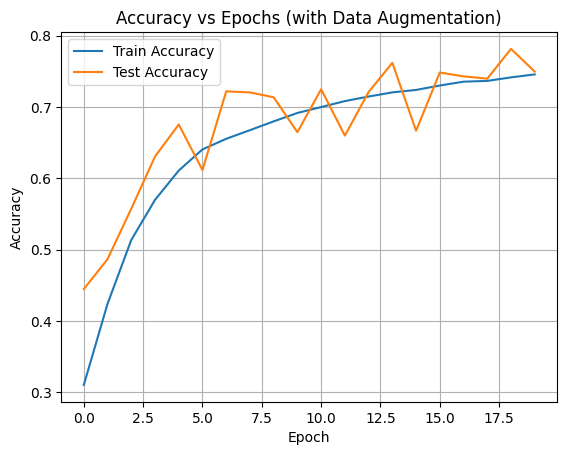

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model using Data Augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Plot Accuracy vs Epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Accuracy vs Epochs (with Data Augmentation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# **NO 8**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Reshape
from tensorflow.keras.utils import to_categorical
import numpy as np

# Choose dataset: 'mnist' or 'fashion'
dataset_choice = 'fashion'  # 'mnist' or 'fashion'

# Load data
if dataset_choice == 'mnist':
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
else:
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Pad to 32x32 (LeNet-5 expects this)
x_train = np.pad(x_train, ((0,0),(2,2),(2,2)), 'constant')  # 28x28 → 32x32
x_test = np.pad(x_test, ((0,0),(2,2),(2,2)), 'constant')
x_train = x_train.reshape(-1, 32, 32, 1) / 255.0
x_test = x_test.reshape(-1, 32, 32, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# LeNet-5 model
model = Sequential([
    Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32, 32, 1)),
    AveragePooling2D(pool_size=(2, 2)),  # ✅ Added missing argument here
    Conv2D(16, kernel_size=5, activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])


# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy on {dataset_choice.upper()}: {test_acc:.4f}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.7104 - loss: 0.8390 - val_accuracy: 0.8279 - val_loss: 0.4780
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.8455 - loss: 0.4291 - val_accuracy: 0.8545 - val_loss: 0.4086
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.8652 - loss: 0.3724 - val_accuracy: 0.8623 - val_loss: 0.3810
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.8742 - loss: 0.3439 - val_accuracy: 0.8659 - val_loss: 0.3620
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.8801 - loss: 0.3242 - val_accuracy: 0.8747 - val_loss: 0.3423
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8920 - loss: 0.2972 - val_accuracy: 0.8732 - val_loss: 0.3433
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.8976 - loss: 0.2823 - val_accuracy: 0.8847 - val_loss: 0.3217
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9008 - loss: 0.2669 - 

# **NO 9**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Choose architecture: 'vgg16' or 'vgg19'
model_type = 'vgg16'

# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize to 224x224x3 to match VGG input
x_train = tf.image.resize(x_train, (224, 224)) / 255.0
x_test = tf.image.resize(x_test, (224, 224)) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Select VGG base
if model_type == 'vgg16':
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
else:
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
base_model.trainable = False

# Build top model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Combine base + custom top
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ {model_type.upper()} Test Accuracy: {accuracy:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


# **NO 10**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset (keep top 10,000 most frequent words)
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to the same length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build RNN model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(SimpleRNN(32))  # Try LSTM or GRU too
model.add(Dense(1, activation='sigmoid'))  # Binary output: pos or neg

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")
